In [ ]:
!git clone https://github.com/omrodriguez/TC1002S.git


Cloning into 'TC1002S'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 44 (delta 14), reused 44 (delta 14), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [ ]:
%cd TC1002S/


/content/TC1002S


In [ ]:
!unzip DataSets/3.9-Bivariate-Data-Sets.zip -d ./DataSets/


Archive:  DataSets/3.9-Bivariate-Data-Sets.zip
  inflating: ./DataSets/AS3.9/American New Cars and Trucks of 2004.csv  
  inflating: ./DataSets/AS3.9/American New Cars and Trucks of 2004.pdf  
  inflating: ./DataSets/AS3.9/American New Cars of 1993.csv  
  inflating: ./DataSets/AS3.9/American New Cars of 1993.pdf  
  inflating: ./DataSets/AS3.9/Child smokers.csv  
  inflating: ./DataSets/AS3.9/Child Smokers.pdf  
  inflating: ./DataSets/AS3.9/Diamonds are forever.csv  
  inflating: ./DataSets/AS3.9/Diamonds are Forever.pdf  
  inflating: ./DataSets/AS3.9/Dungeness crabs.csv  
  inflating: ./DataSets/AS3.9/Dungeness Crabs.pdf  
  inflating: ./DataSets/AS3.9/Mammal brains.csv  
  inflating: ./DataSets/AS3.9/Mammal brains.pdf  
  inflating: ./DataSets/AS3.9/Oil tanker spills.csv  
  inflating: ./DataSets/AS3.9/Oil Tanker Spills.pdf  
  inflating: ./DataSets/AS3.9/Pace of life.csv  
  inflating: ./DataSets/AS3.9/The Pace of Life.pdf  
  inflating: ./DataSets/AS3.9/World population.csv  
  

In [ ]:
%cd ..

/content


# Importar Librerías
Se importan las librerías necesarias, en este caso se utilizará pandas, numpy, matplotlib y seaborn 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Se lee el csv con la función read_csv de pandas



In [2]:
df = pd.read_csv("2.csv")


Se reemplaza los valores na con la media por columna

In [3]:
for column in df.columns:
    if np.issubdtype(df[column].values.dtype, np.number):
        df[column].fillna(df[column].mean())


Se dropean las filas con na

In [4]:
df=df.dropna()

Se obtiene la estadistica descriptiva

In [5]:
df.describe()

Retail Price ($US)  Cost Price ($US)  ...  Length (cm)  Width (cm)
count          389.000000        389.000000  ...   389.000000  389.000000
mean         33226.984576      30438.197943  ...   469.871465  181.025707
std          19679.209333      17860.561429  ...    33.565967    8.561744
min          10280.000000       9875.000000  ...   363.000000  163.000000
25%          21055.000000      19638.000000  ...   450.000000  175.000000
50%          28495.000000      26155.000000  ...   472.000000  180.000000
75%          39465.000000      36162.000000  ...   490.000000  185.000000
max         192465.000000     173560.000000  ...   561.000000  206.000000

[8 rows x 11 columns]

Se obtiene el heatmap a partir de la función corr del dataframe

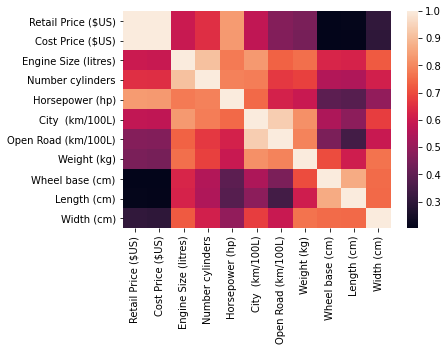

In [6]:
h=sb.heatmap(df.corr())


Se separan las columnas numéricas y categóricas

In [7]:
def getTypeOfDataDist(df):
    res = {"numeric":0, "object":0}
    cols = {"numeric": [], "object":[]}
    for column in df.columns:
        if np.issubdtype(df[column].values.dtype, np.number):
            res["numeric"] = res["numeric"]+1
            a=cols["numeric"]
            a.append(column)
            cols["numeric"]=a
        else:

            res["object"] = res["object"]+1
            a=cols["object"]
            a.append(column)
            cols["object"]=a
    return res, cols

In [8]:
dist, cols = getTypeOfDataDist(df)
cols["numeric"]

['Retail Price ($US)',
 'Cost Price ($US)',
 'Engine Size (litres)',
 'Number cylinders',
 'Horsepower (hp)',
 'City  (km/100L)',
 'Open Road (km/100L)',
 'Weight (kg)',
 'Wheel base (cm)',
 'Length (cm)',
 'Width (cm)']

Se generan los histogramas con la función hist()

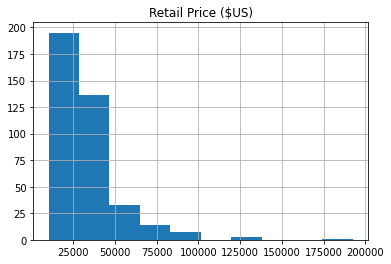

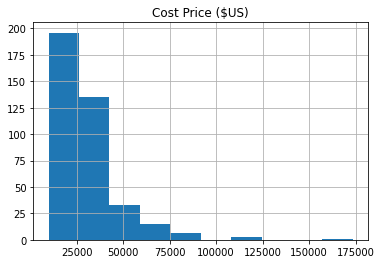

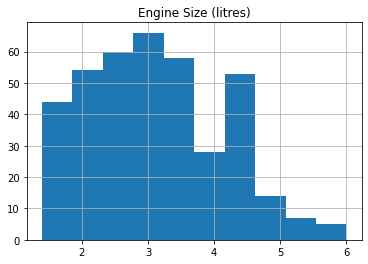

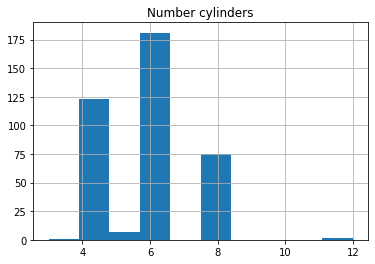

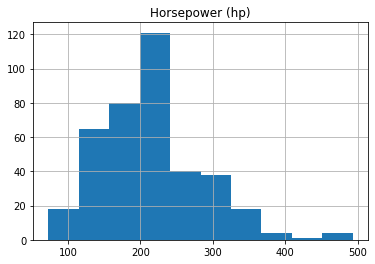

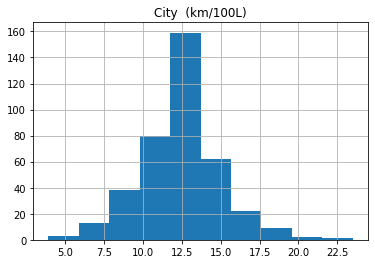

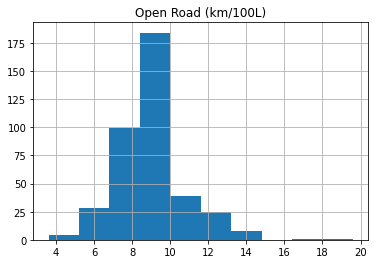

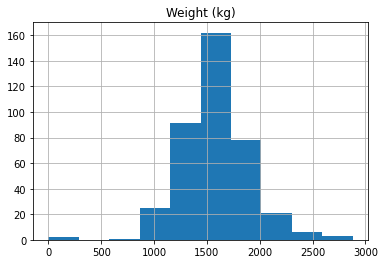

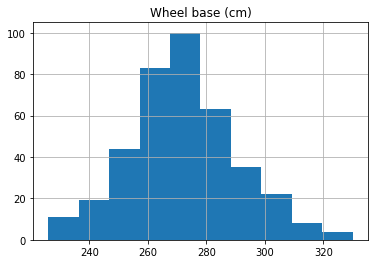

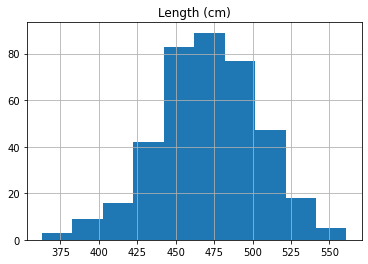

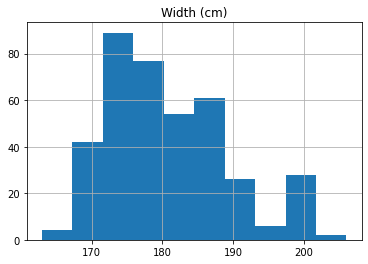

In [9]:
for column in cols["numeric"]:
    df[column].hist()
    plt.title(column)
    plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

Se generan scatter plots con las distintas comparaciones de variables y su respectiva linea de tendencia

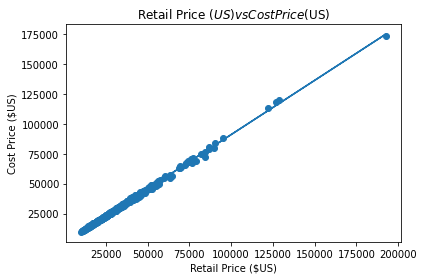

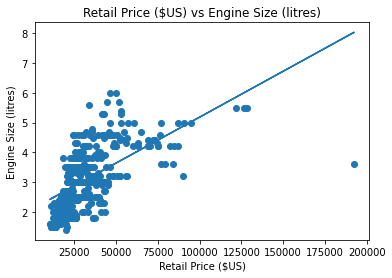

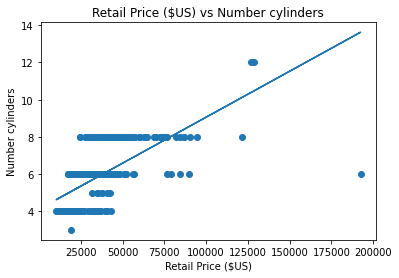

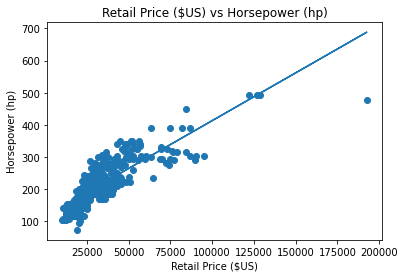

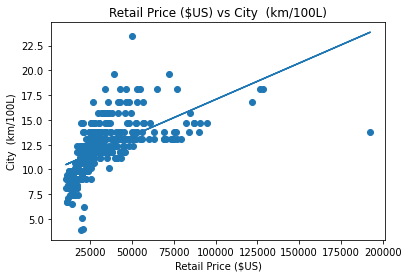

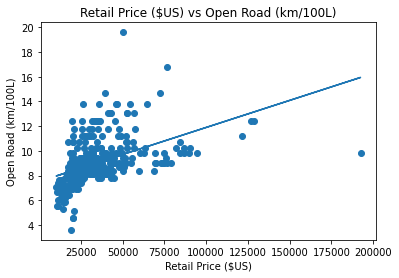

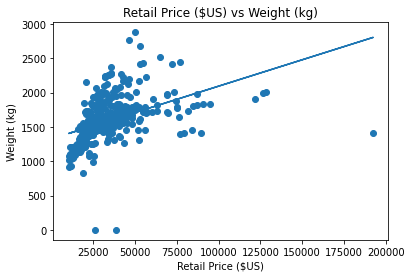

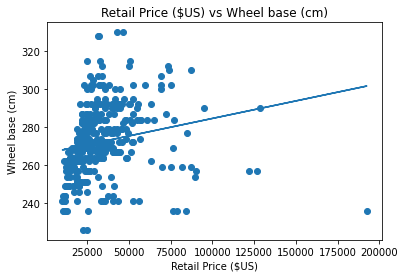

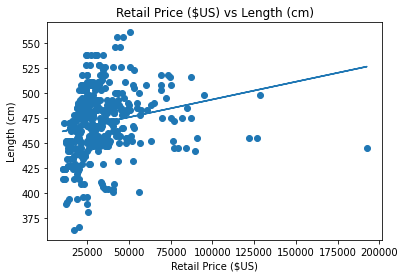

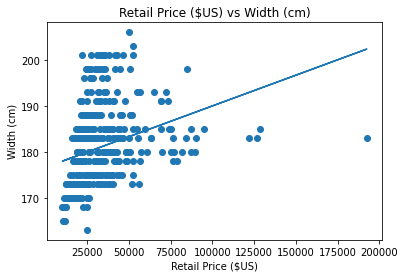

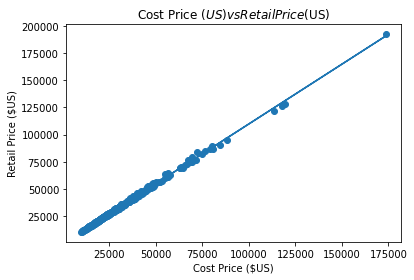

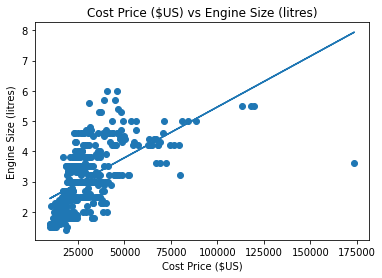

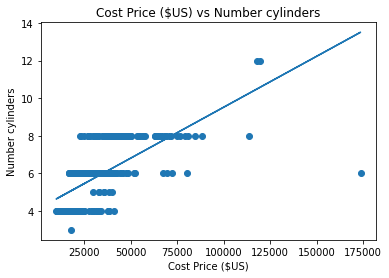

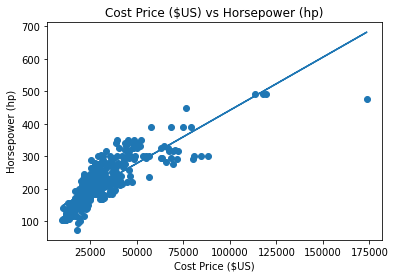

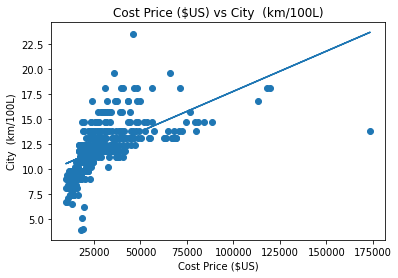

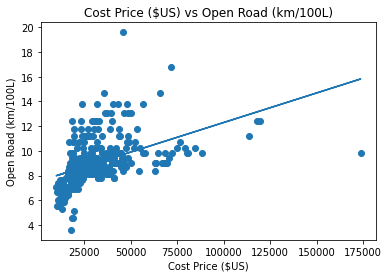

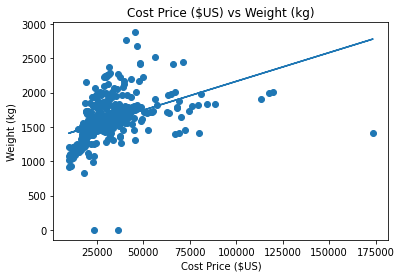

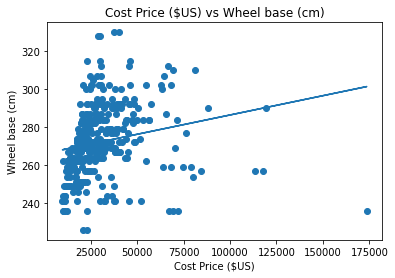

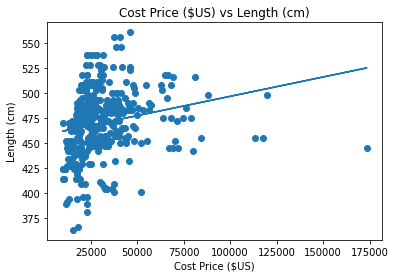

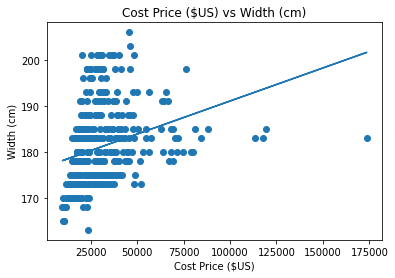

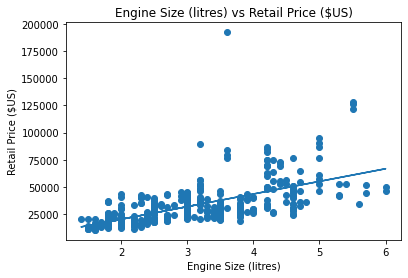

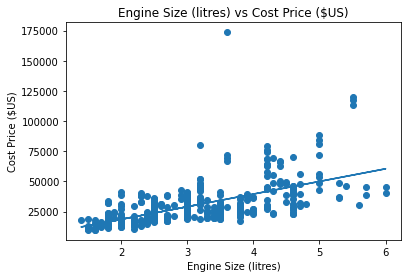

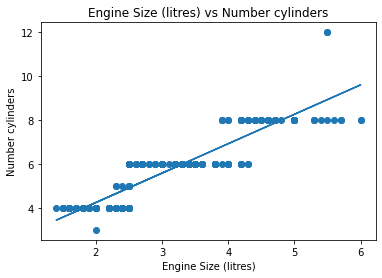

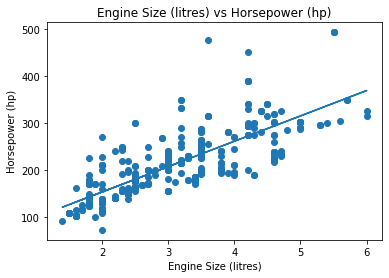

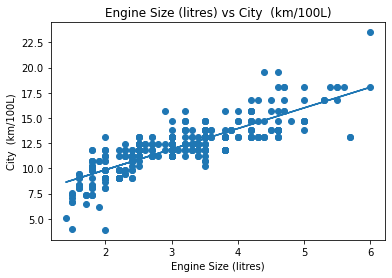

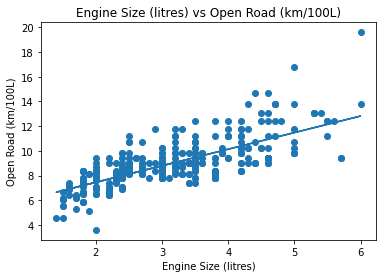

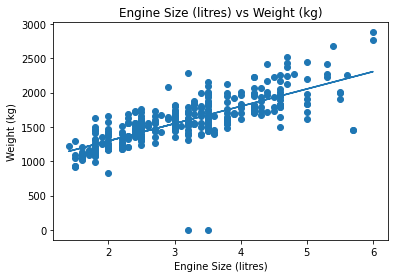

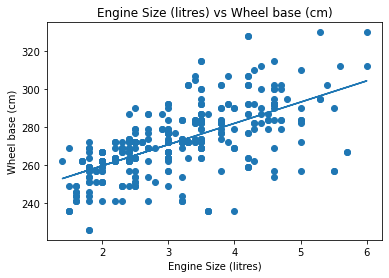

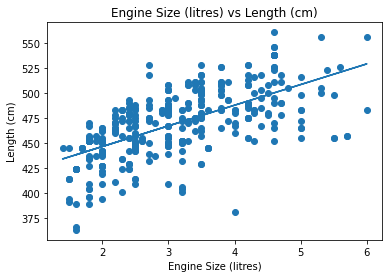

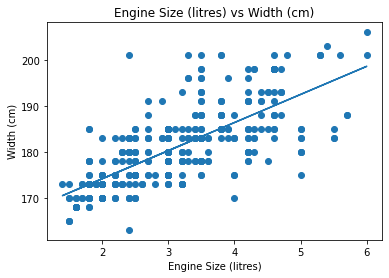

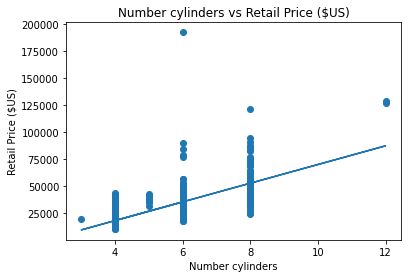

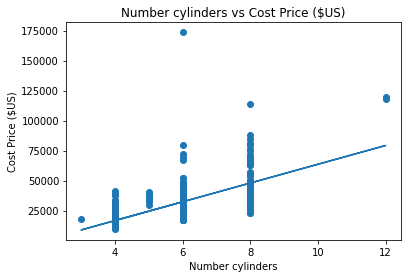

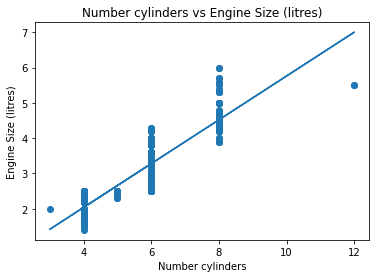

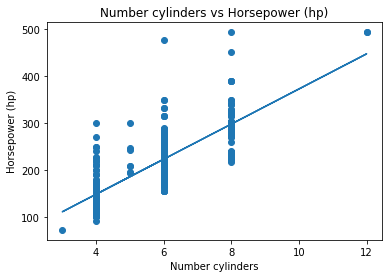

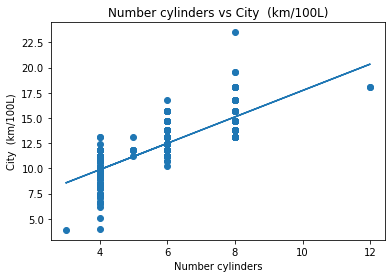

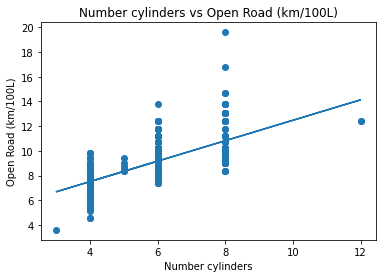

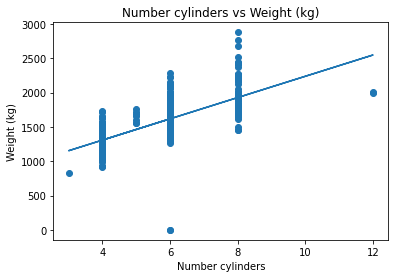

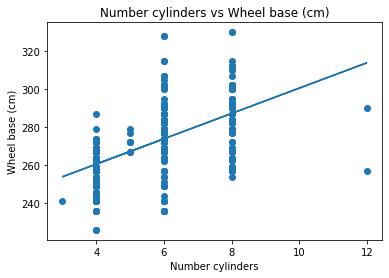

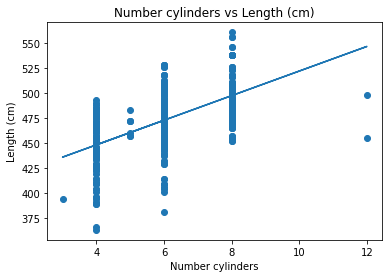

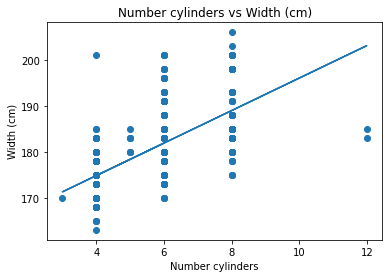

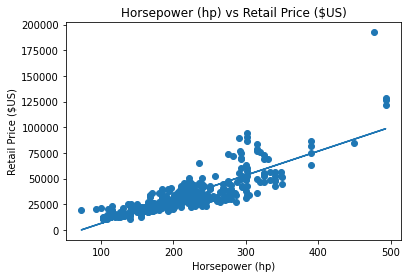

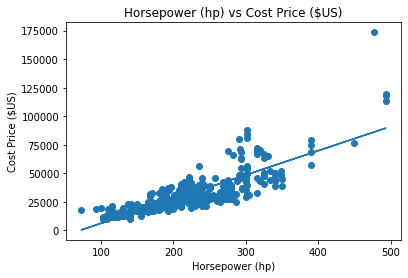

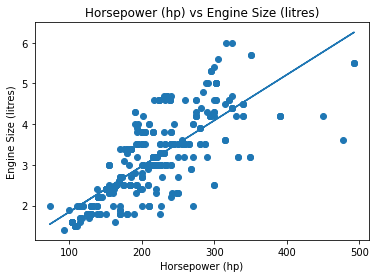

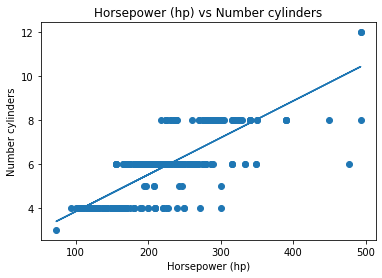

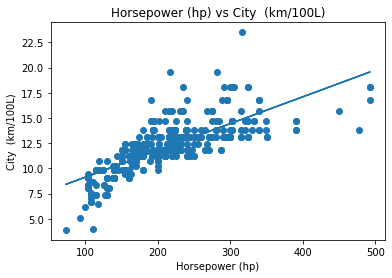

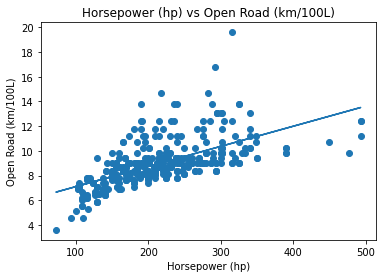

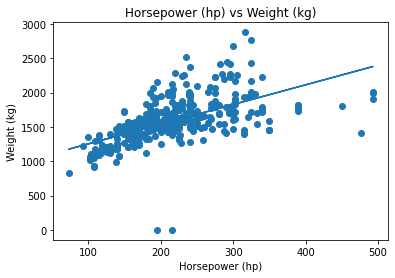

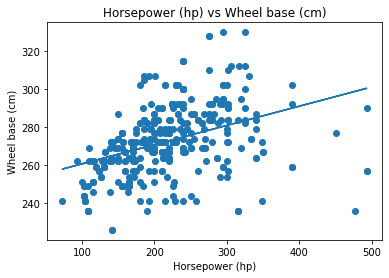

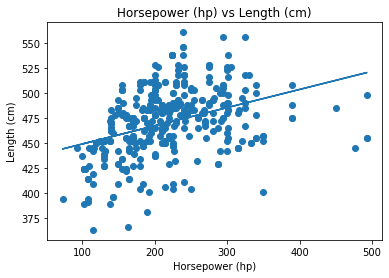

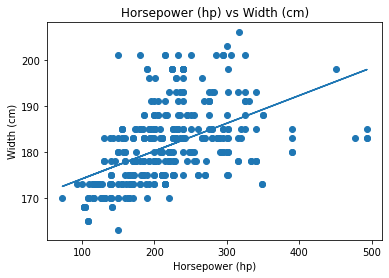

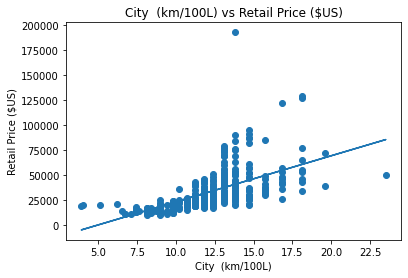

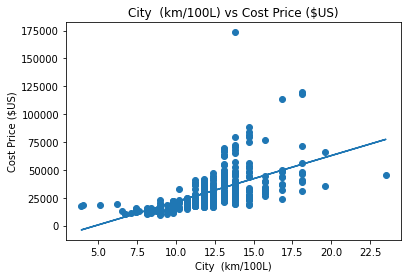

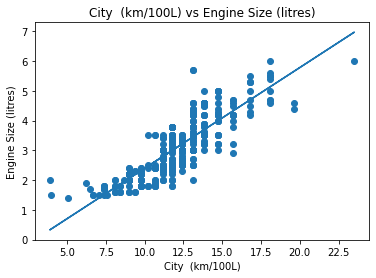

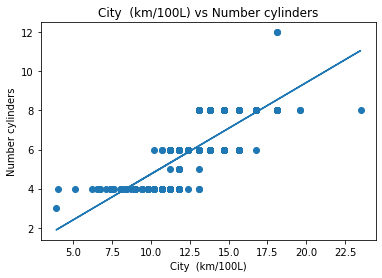

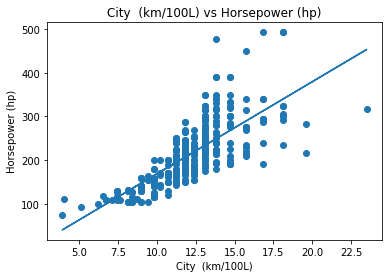

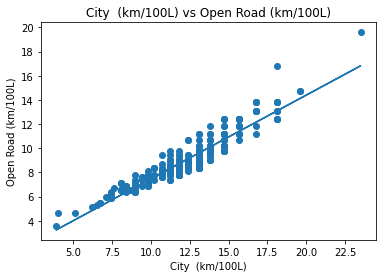

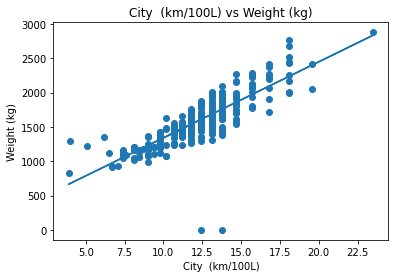

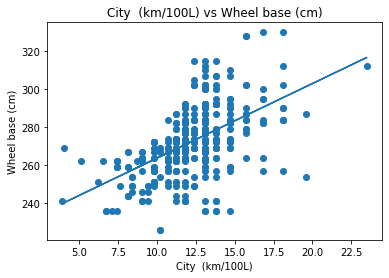

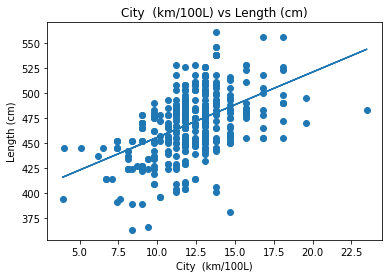

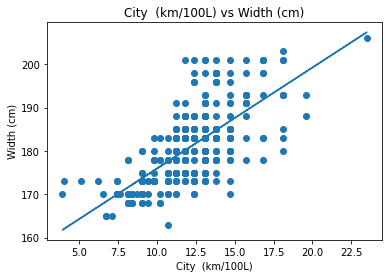

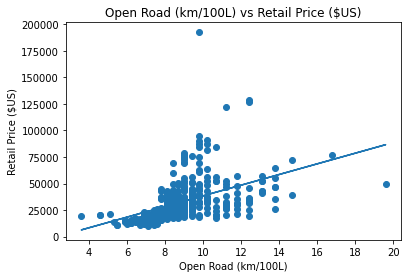

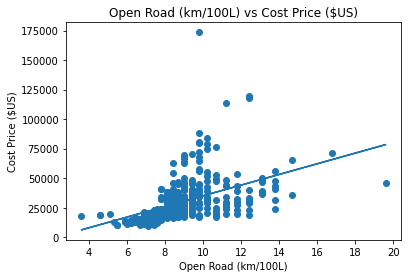

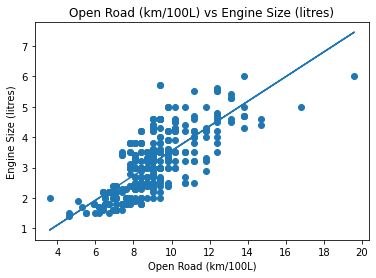

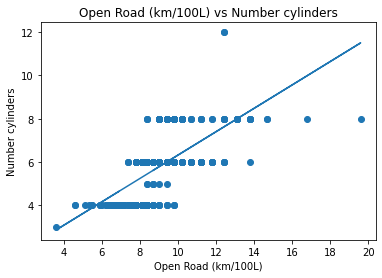

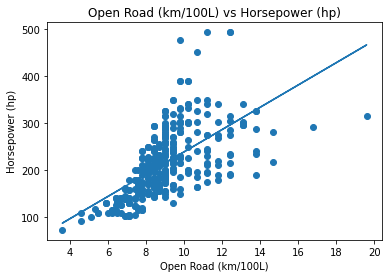

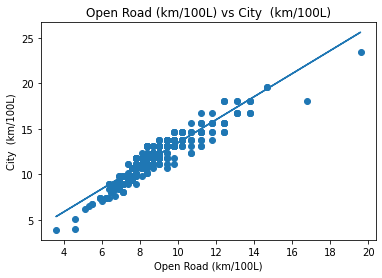

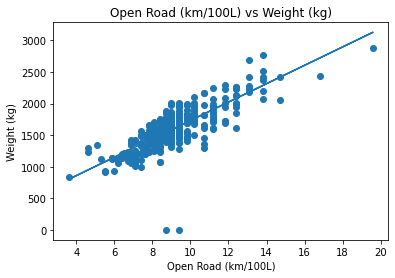

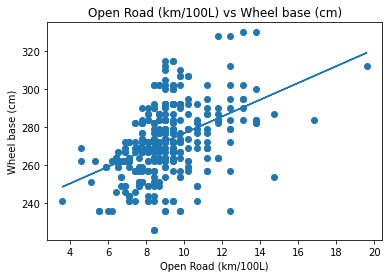

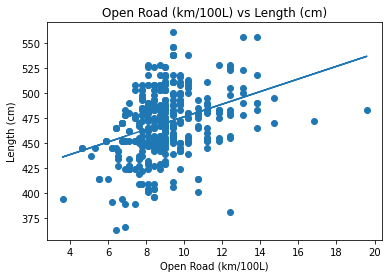

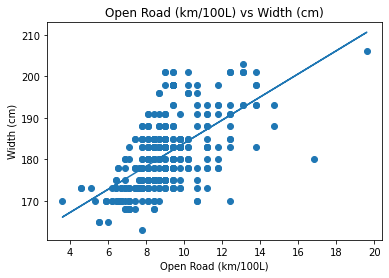

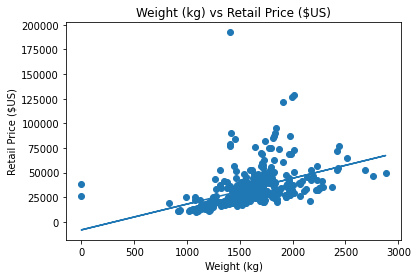

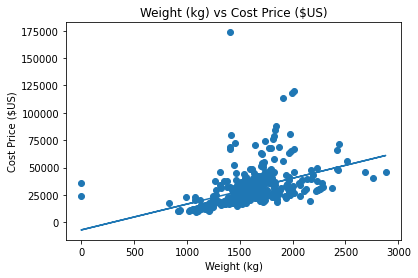

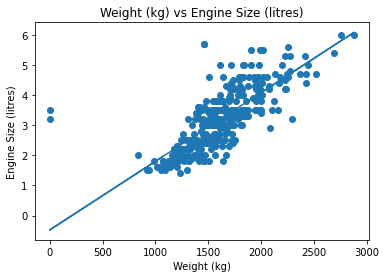

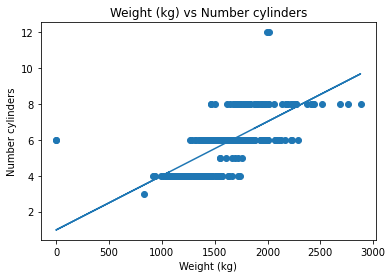

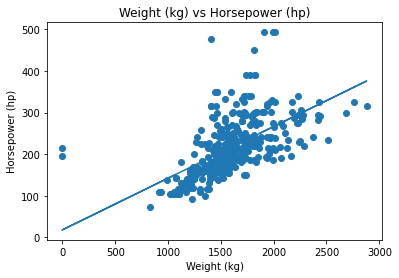

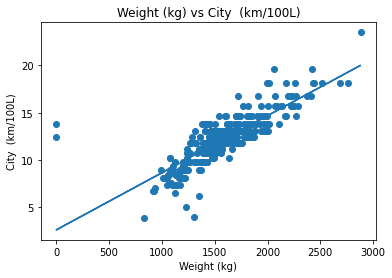

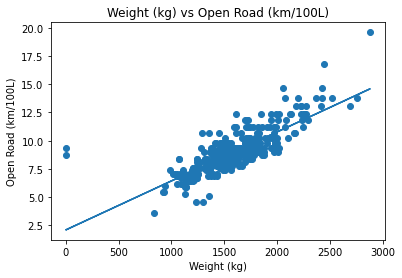

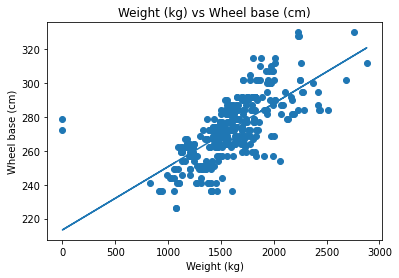

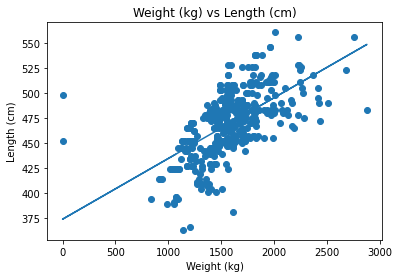

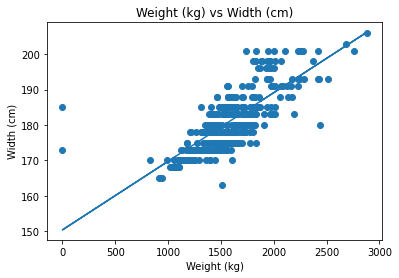

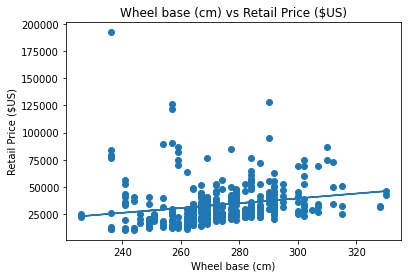

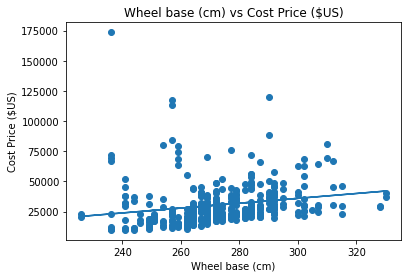

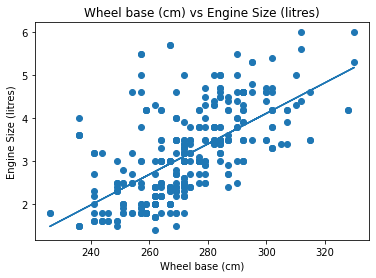

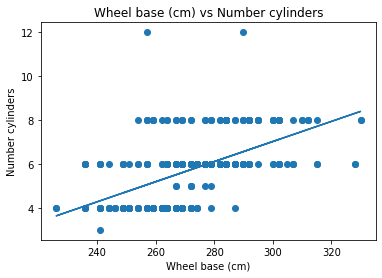

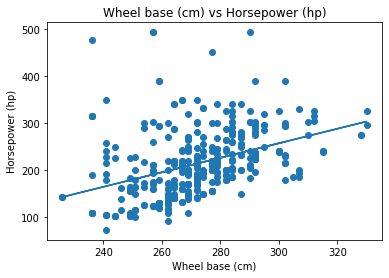

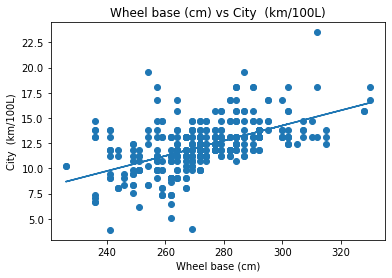

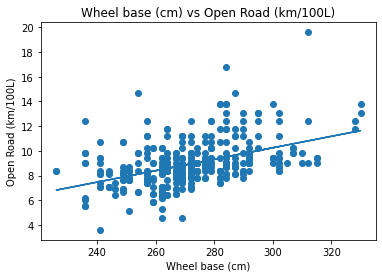

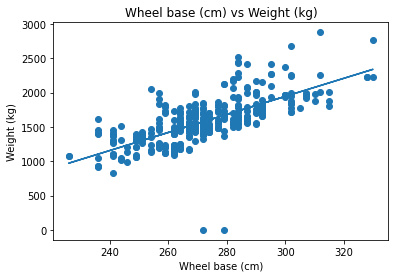

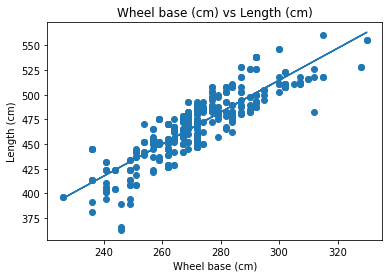

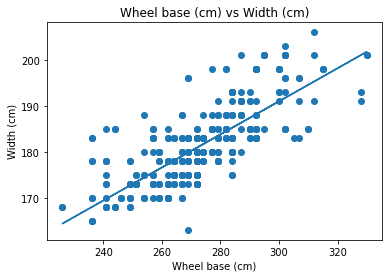

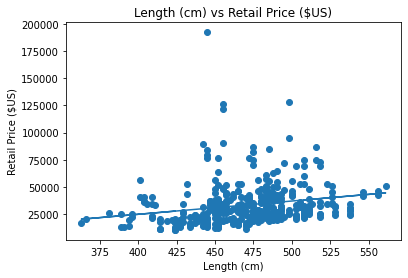

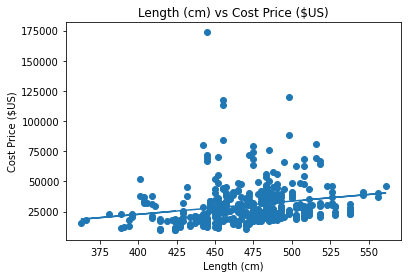

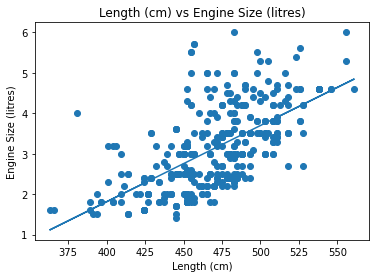

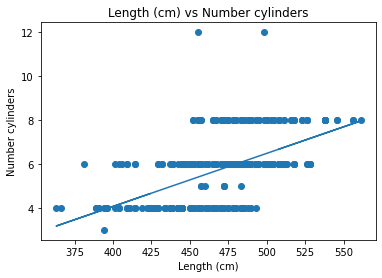

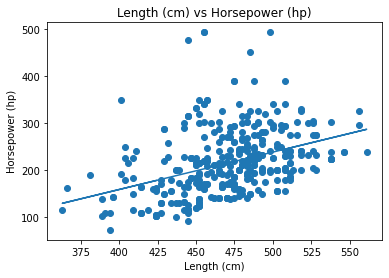

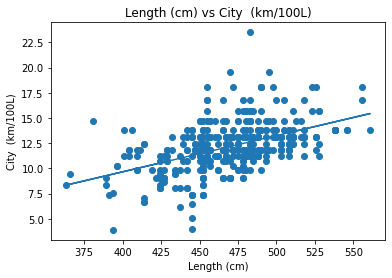

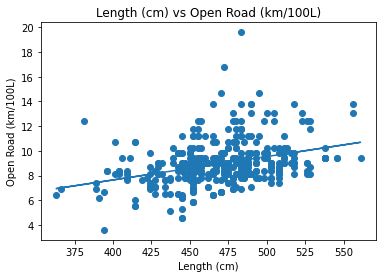

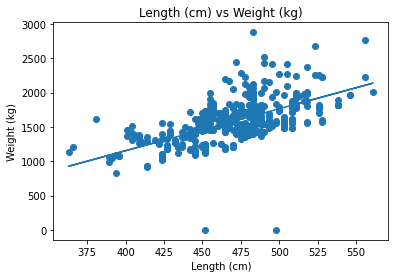

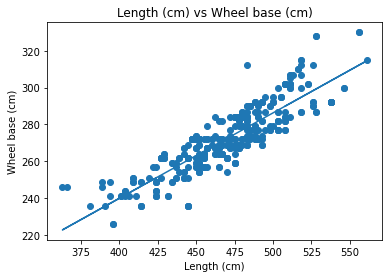

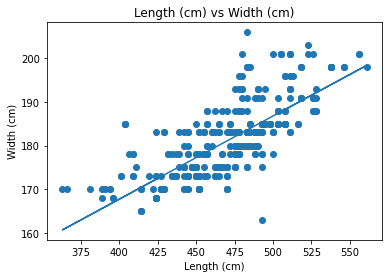

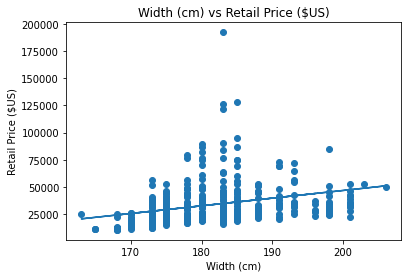

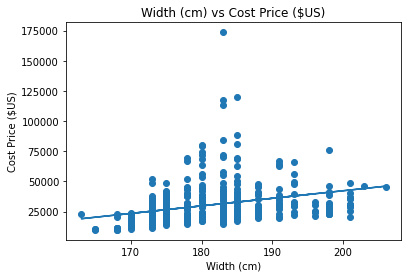

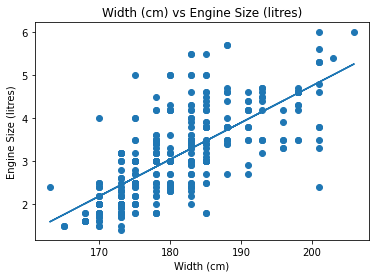

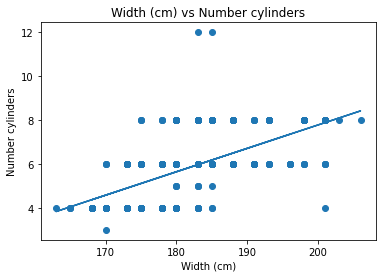

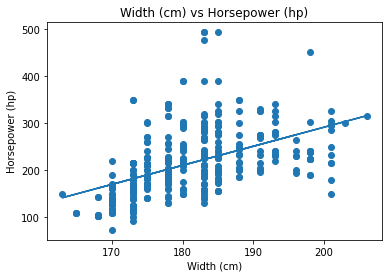

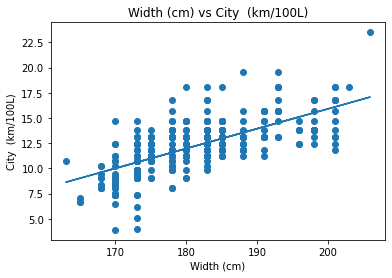

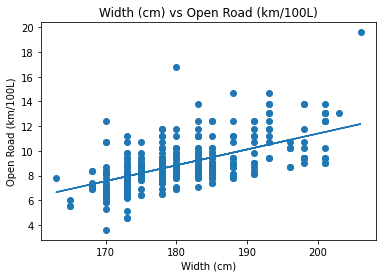

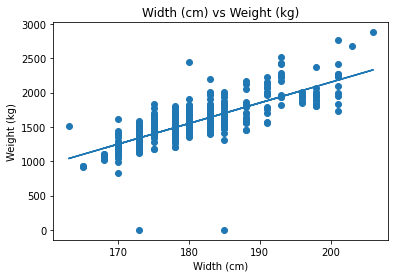

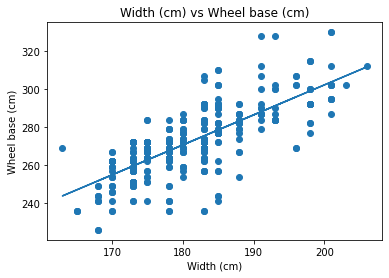

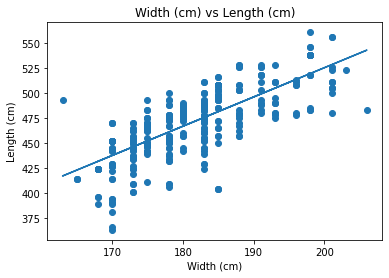

In [11]:
for column in cols["numeric"]:
    for counter_column in cols["numeric"]:
        if column != counter_column:
            try:
                linear_regressor = LinearRegression()  # create object for the class
                linear_regressor.fit(df[column].values.reshape(-1,1), df[counter_column].values.reshape(-1,1))  # perform linear regression
                Y_pred = linear_regressor.predict(df[column].values.reshape(-1,1))
                plt.plot(df[column].values.reshape(-1,1), Y_pred)
            except:
                continue
            plt.scatter(df[column], df[counter_column])
            
            plt.title(f"{column} vs {counter_column}")
            
            plt.xlabel(column)
            plt.ylabel(counter_column)
            plt.show()

Se generan las box plots


Retail Price ($US)


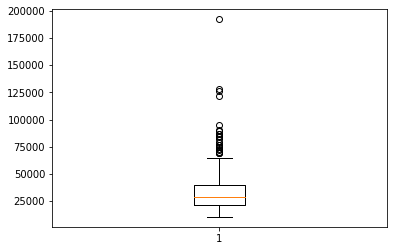

Cost Price ($US)


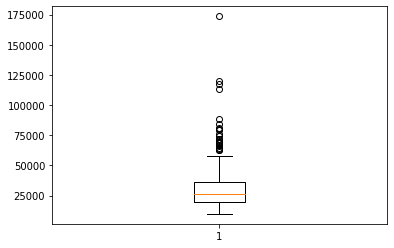

Engine Size (litres)


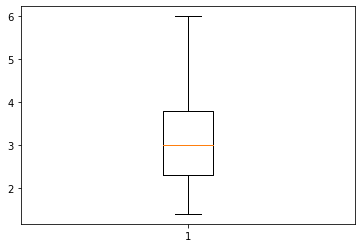

Number cylinders


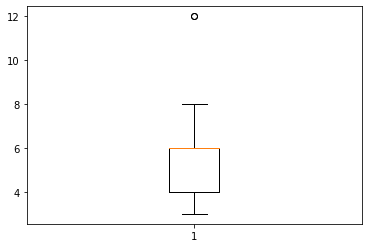

Horsepower (hp)


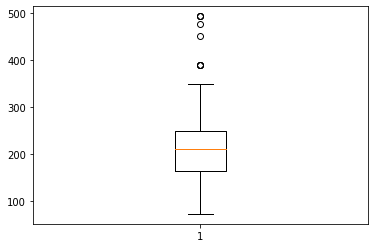

City  (km/100L)


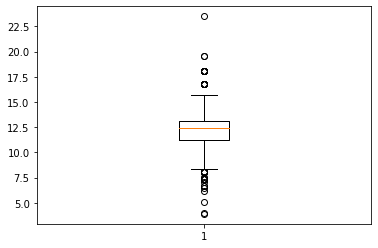

Open Road (km/100L)


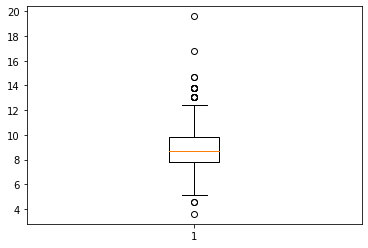

Weight (kg)


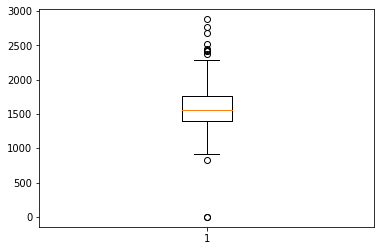

Wheel base (cm)


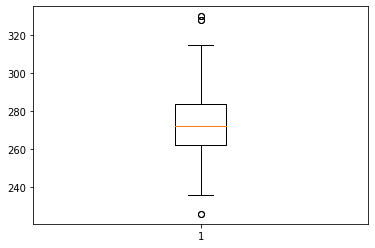

Length (cm)


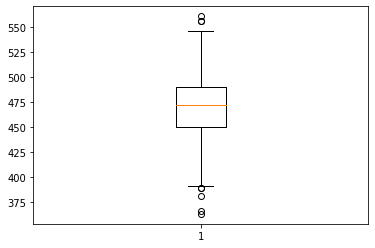

Width (cm)


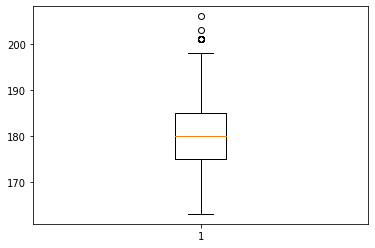

In [12]:
for i in df.columns.values:
    
    if (np.issubdtype(df[i].values.dtype, np.number) ):
        print(i)
        plt.boxplot(df[i].values)
        plt.show()

In [13]:
from sklearn.cluster import KMeans

Se utiliza el min max scales para escalar los datos de 0 a 1

In [23]:
X=df[cols["numeric"]].values
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_2 = min_max.fit_transform(X)


array([[0.00773939, 0.00665913, 0.04347826, ..., 0.22115385, 0.30808081,
        0.11627907],
       [0.01265197, 0.01177261, 0.04347826, ..., 0.22115385, 0.13131313,
        0.11627907],
       [0.02376705, 0.02334973, 0.17391304, ..., 0.36538462, 0.51515152,
        0.27906977],
       ...,
       [0.11576145, 0.1135046 , 0.43478261, ..., 0.77884615, 0.74747475,
        0.46511628],
       [0.07253616, 0.06917555, 0.41304348, ..., 0.73076923, 0.73232323,
        0.76744186],
       [0.10165491, 0.09661851, 0.41304348, ..., 0.73076923, 0.73232323,
        0.76744186]])

Se utiliza kmeans para obtener los clusters

In [25]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_2)

In [26]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,

In [27]:
kmeans.cluster_centers_

array([[0.22754349, 0.22761788, 0.65949423, 0.50793651, 0.51671526,
        0.55752811, 0.4505102 , 0.68202948, 0.61116562, 0.68614719,
        0.64428097],
       [0.05070382, 0.05040219, 0.13845331, 0.11930783, 0.17517564,
        0.29018903, 0.23939549, 0.44369592, 0.3017024 , 0.39927968,
        0.23865803],
       [0.12136743, 0.12078785, 0.38255724, 0.32478632, 0.34881657,
        0.43841324, 0.33801775, 0.54816321, 0.45323168, 0.55627279,
        0.41901748]])

Se guardan los centros en una variable

In [28]:
clusters = kmeans.cluster_centers_

Se obtiene la distancia entre los centros

In [41]:
for index_i, i in enumerate(clusters):
    for index_j, j in enumerate(clusters):
        print(f"i:{index_i}, j:{index_j}, d: {np.linalg.norm(i-j)}")

i:0, j:0, d: 0.0
i:0, j:1, d: 1.0570126674470537
i:0, j:2, d: 0.5462886399117474
i:1, j:0, d: 1.0570126674470537
i:1, j:1, d: 0.0
i:1, j:2, d: 0.5144457874339808
i:2, j:0, d: 0.5462886399117474
i:2, j:1, d: 0.5144457874339808
i:2, j:2, d: 0.0


In [115]:
labels=kmeans.predict(X)

Se plotean los datos con su respectiva etiqueta obtenida por kmeans

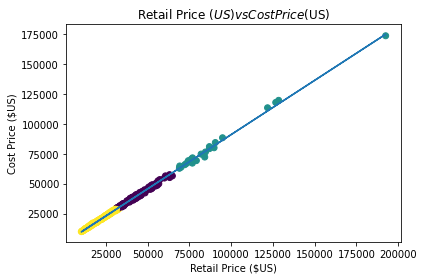

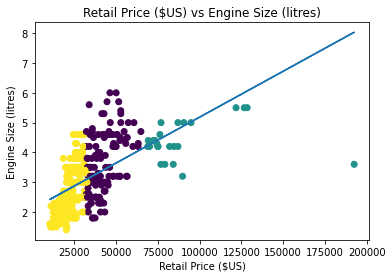

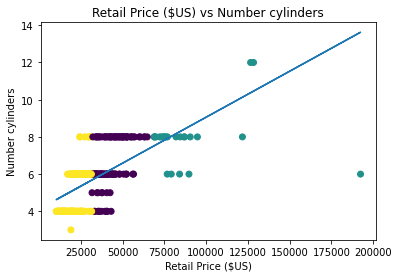

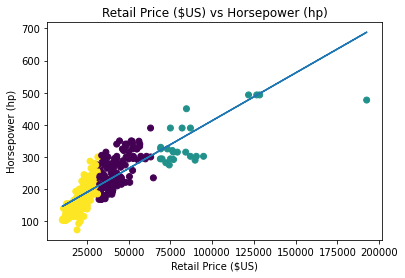

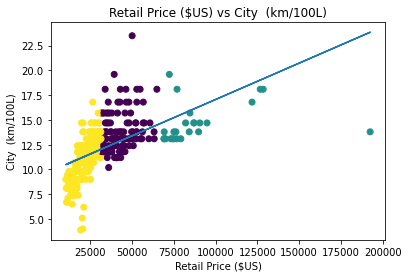

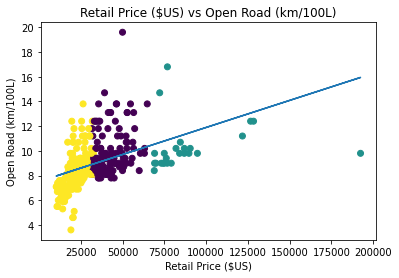

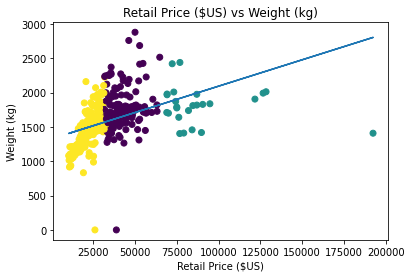

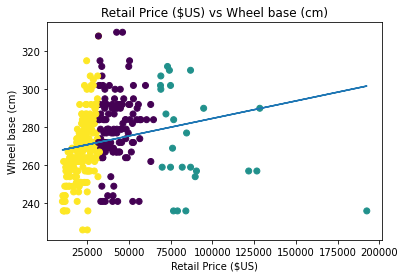

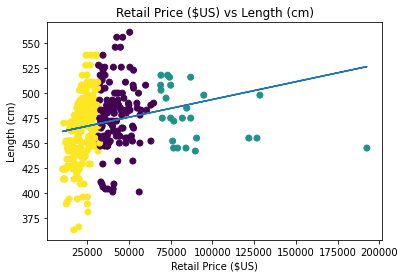

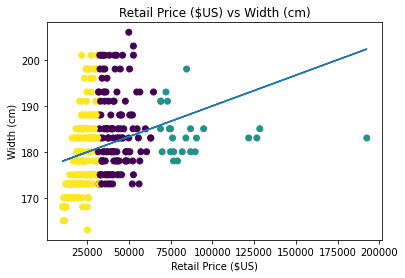

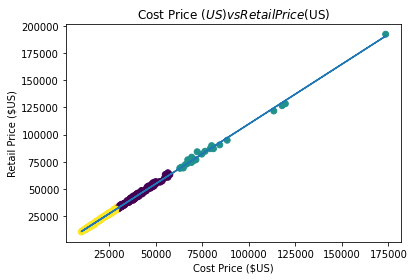

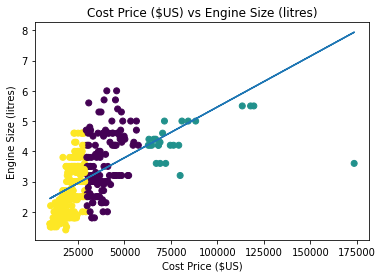

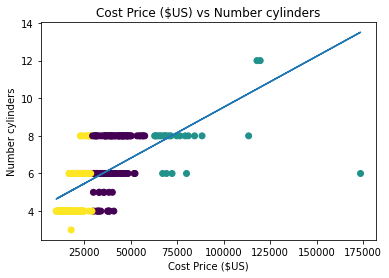

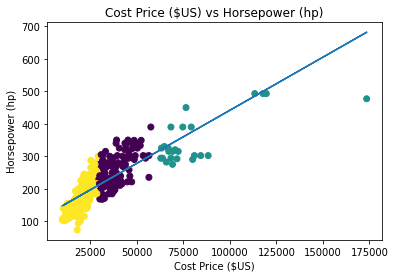

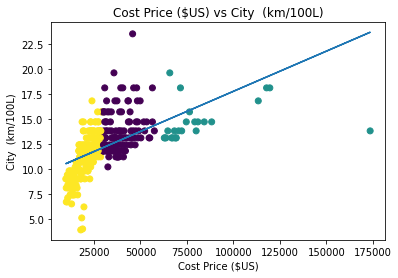

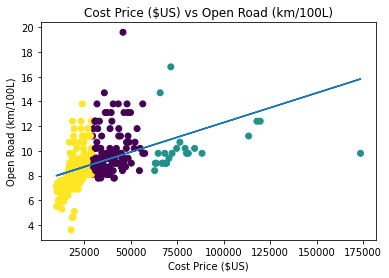

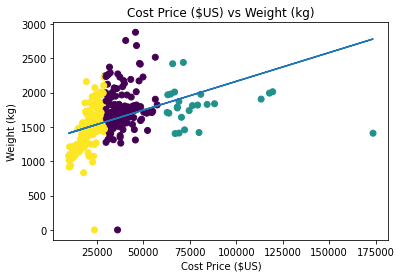

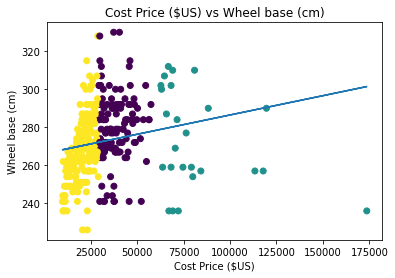

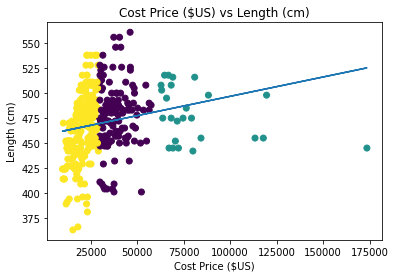

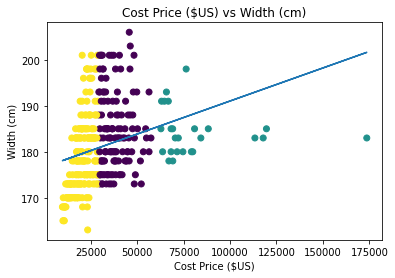

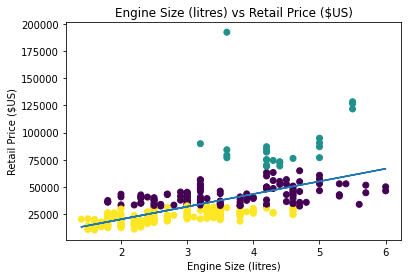

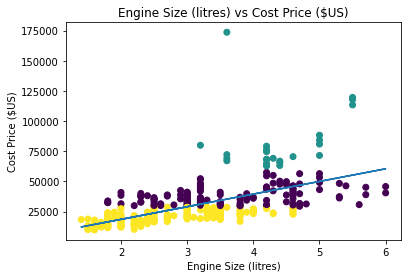

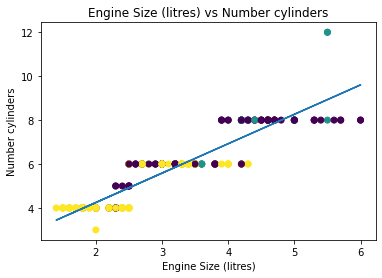

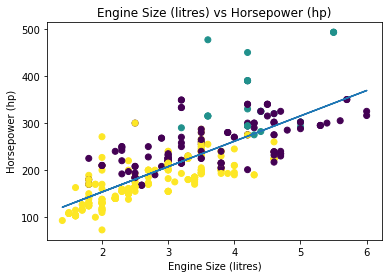

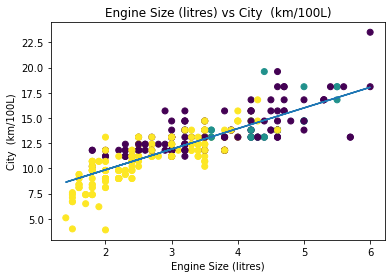

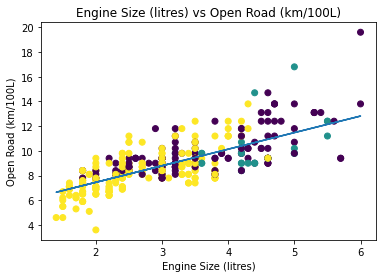

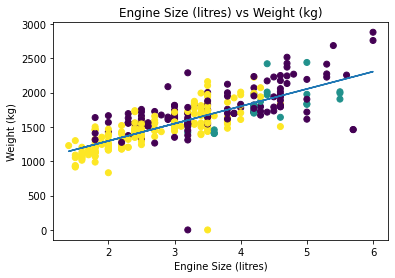

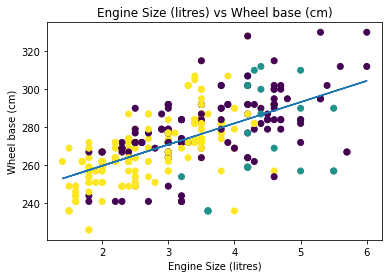

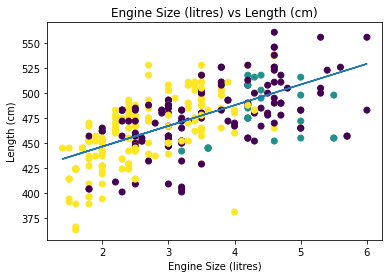

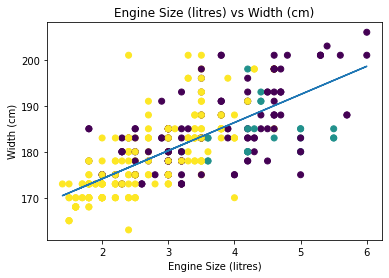

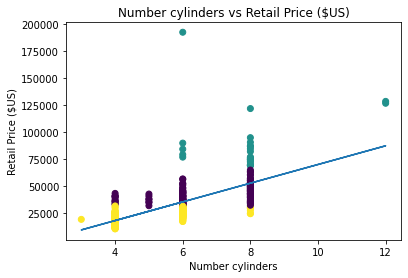

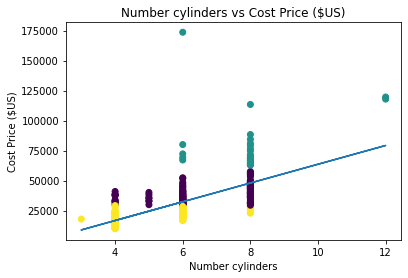

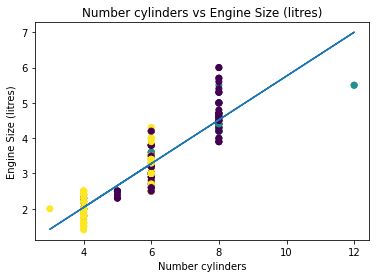

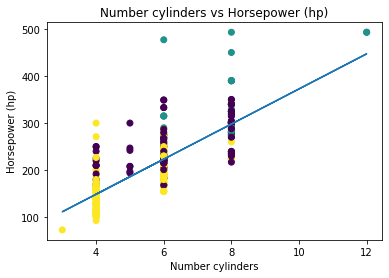

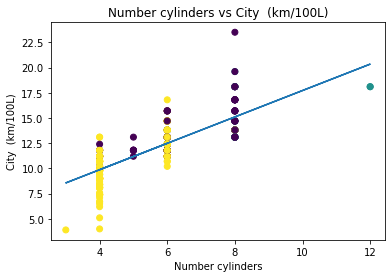

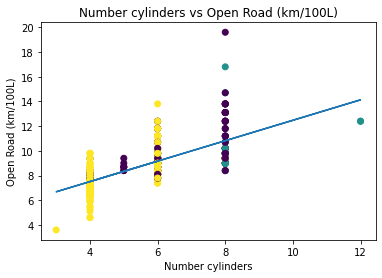

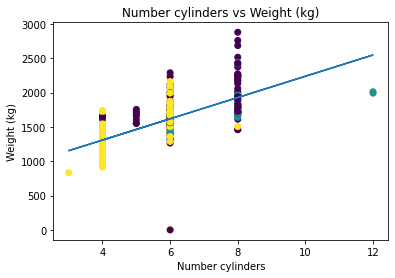

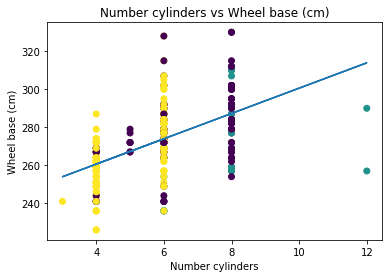

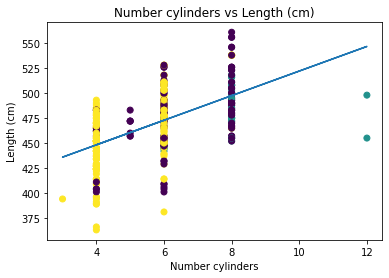

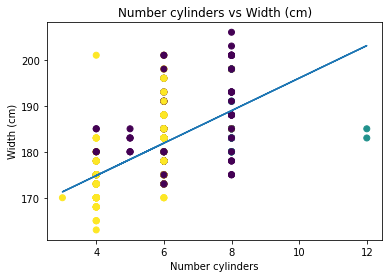

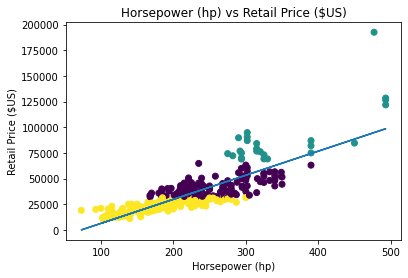

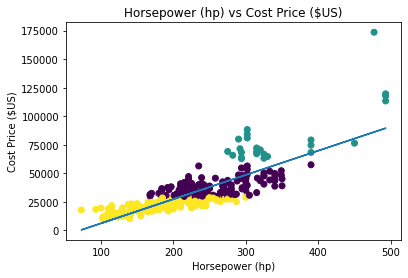

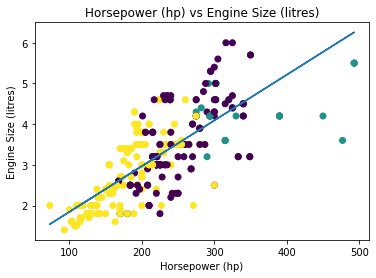

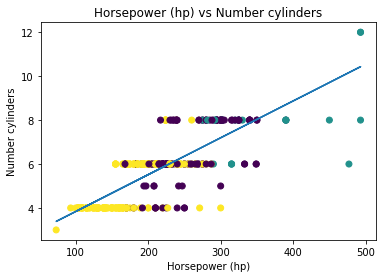

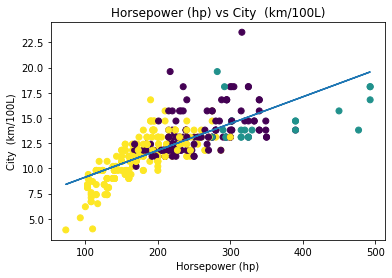

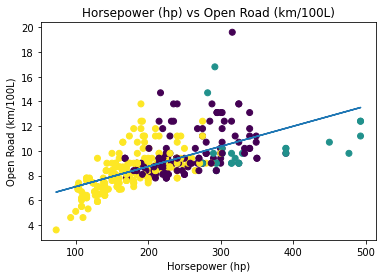

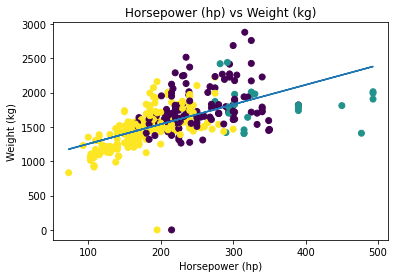

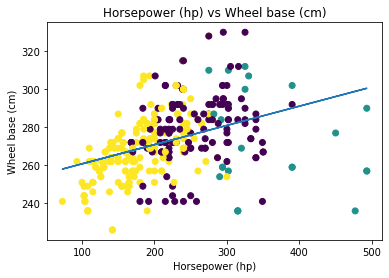

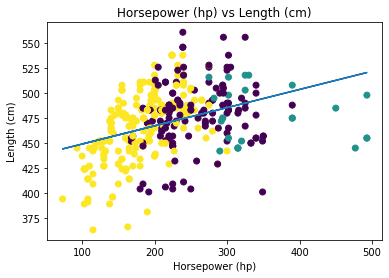

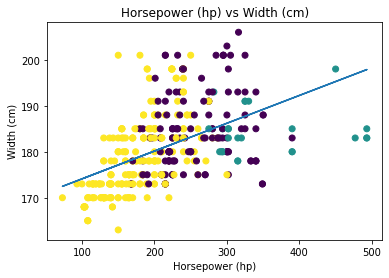

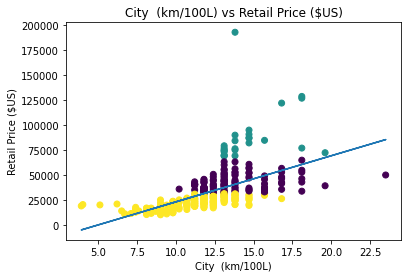

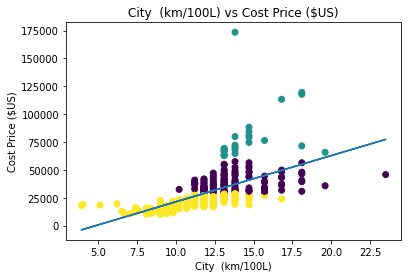

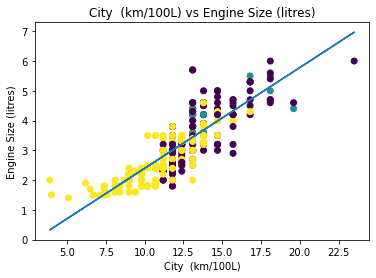

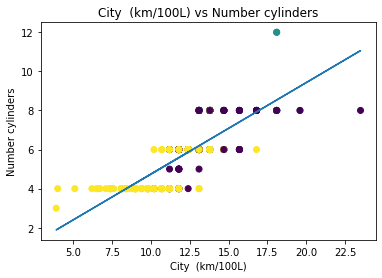

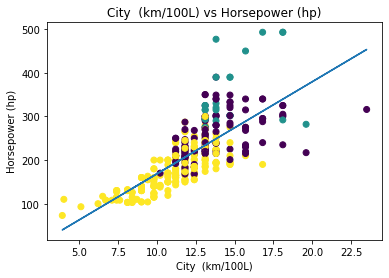

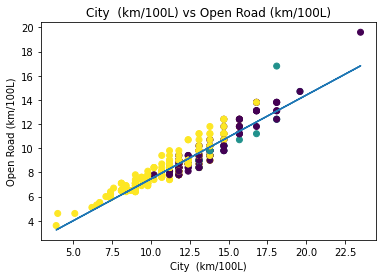

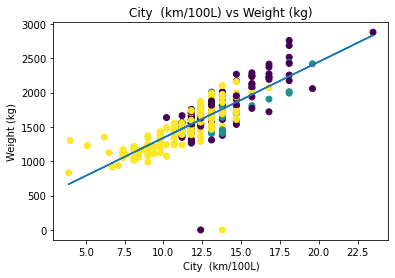

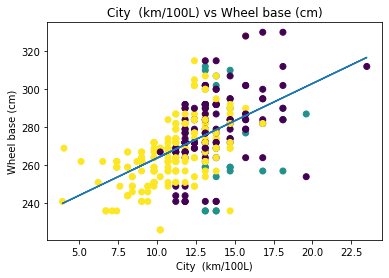

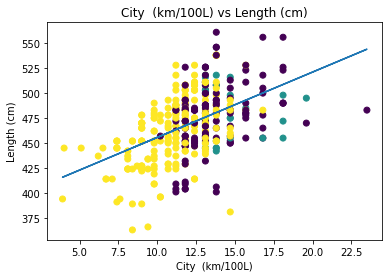

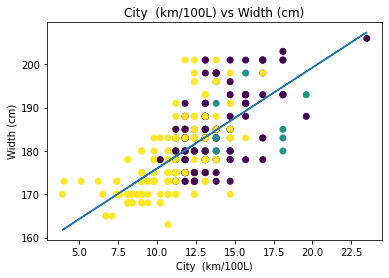

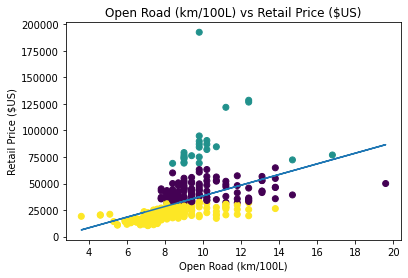

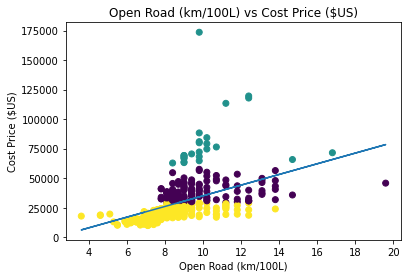

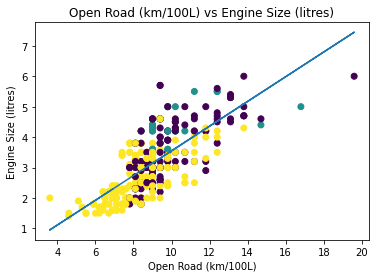

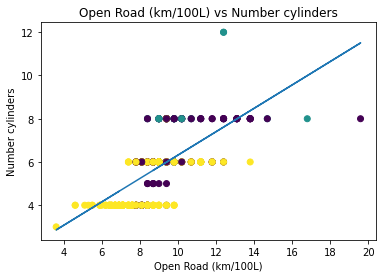

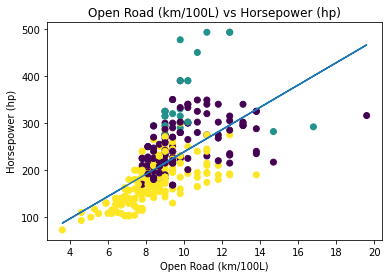

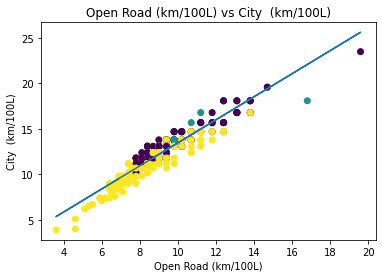

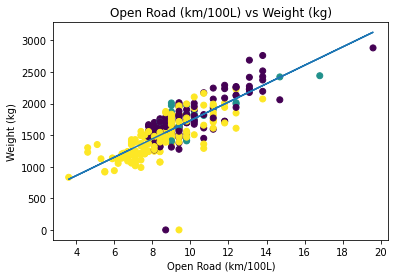

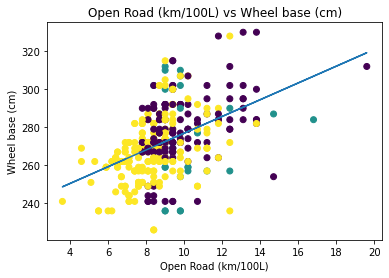

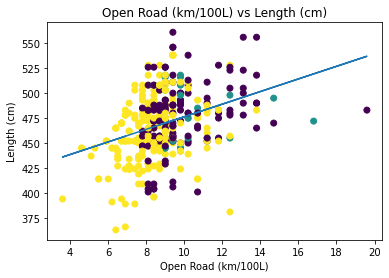

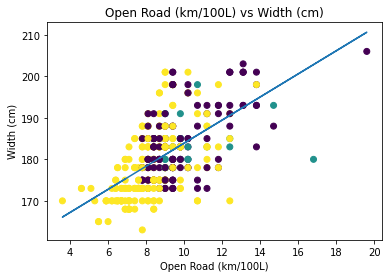

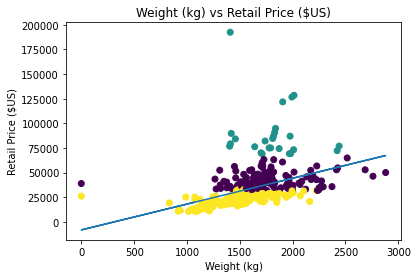

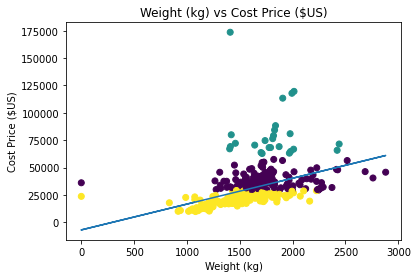

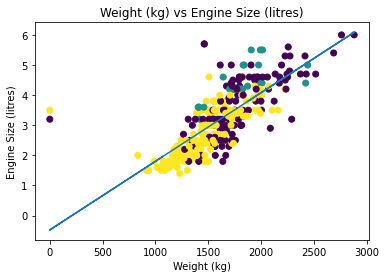

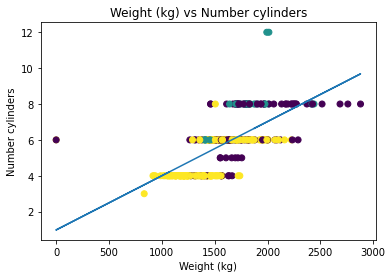

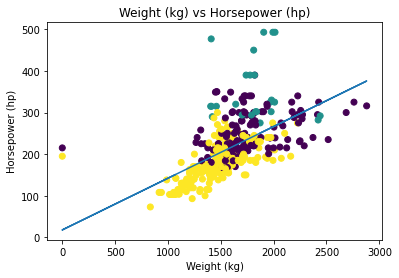

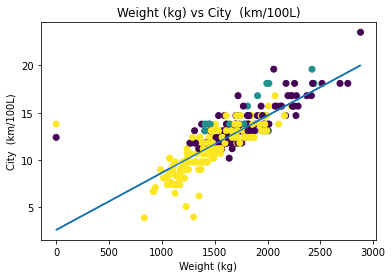

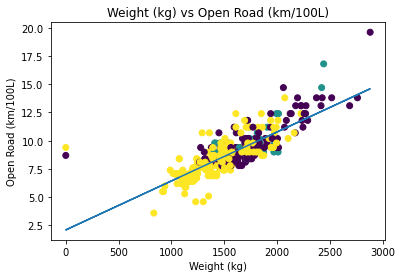

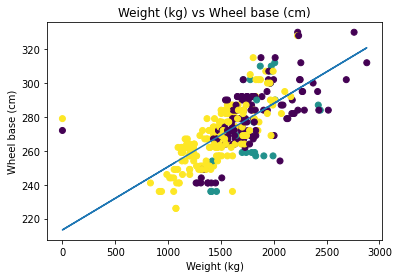

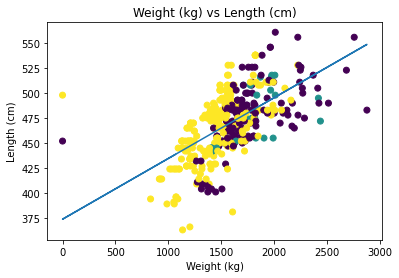

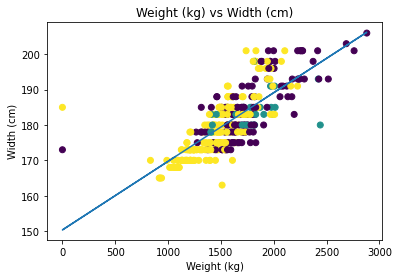

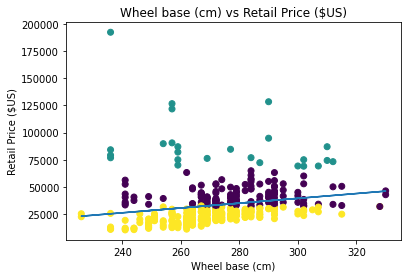

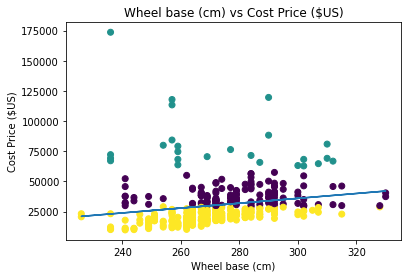

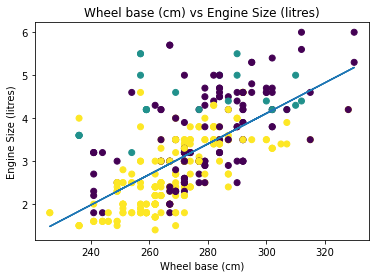

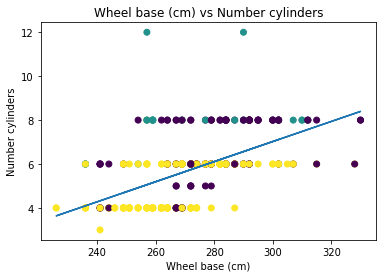

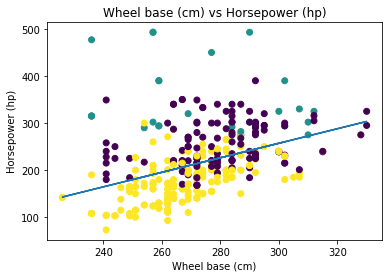

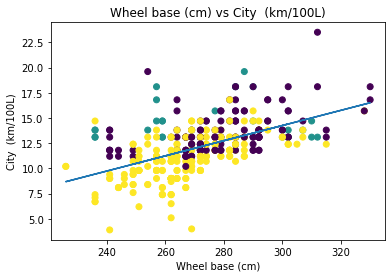

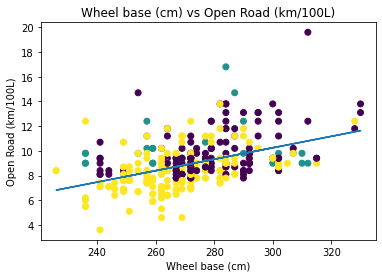

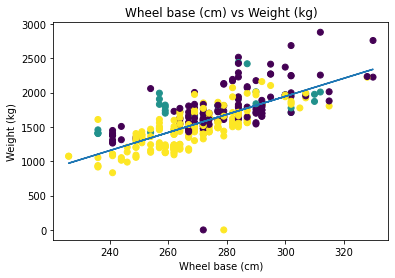

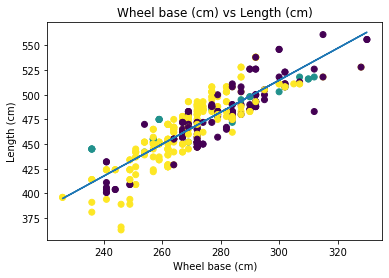

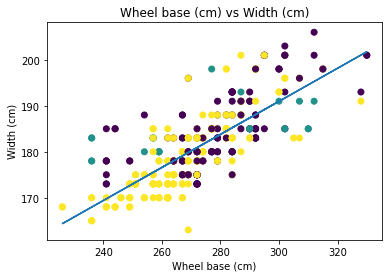

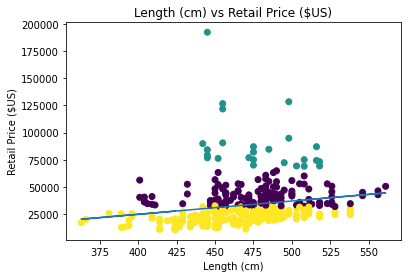

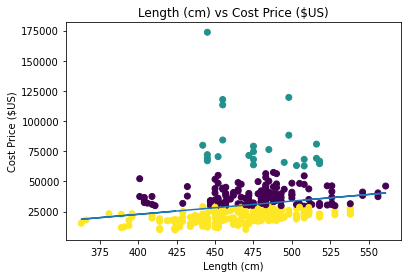

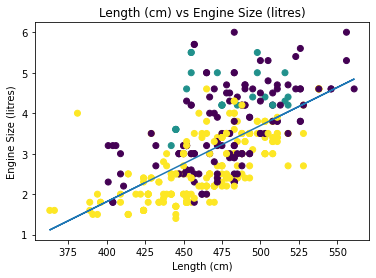

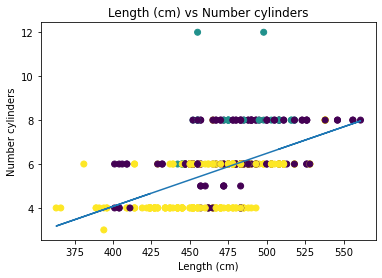

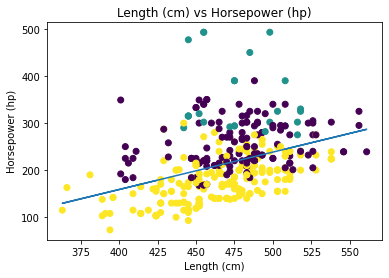

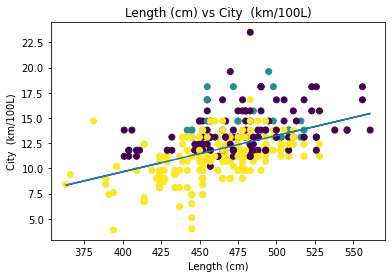

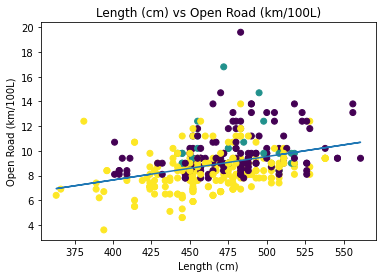

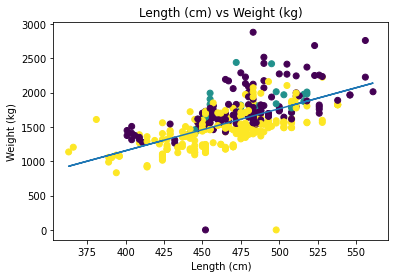

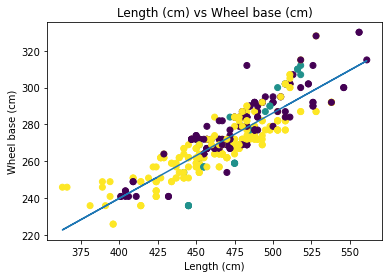

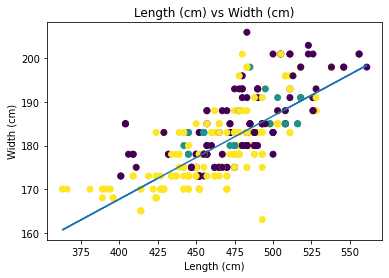

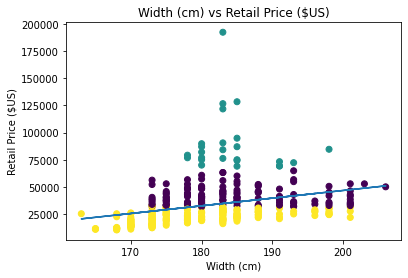

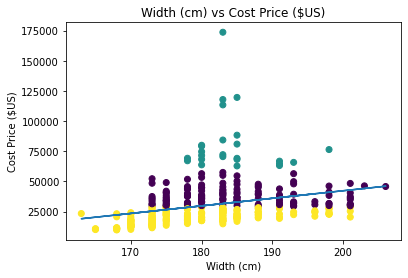

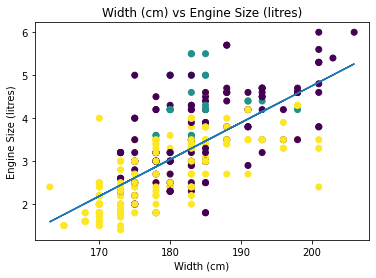

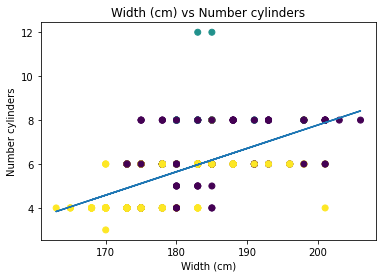

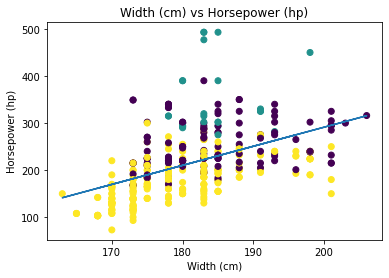

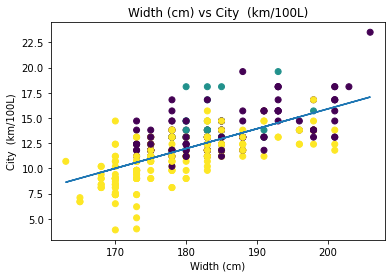

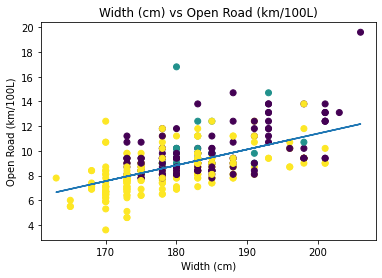

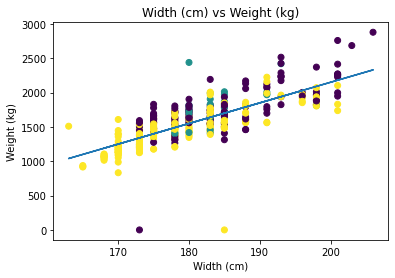

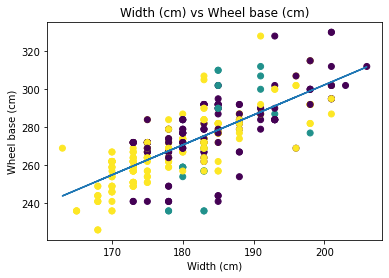

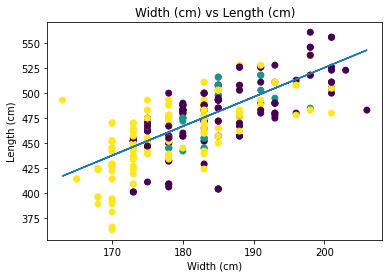

In [116]:
for column in cols["numeric"]:
    for counter_column in cols["numeric"]:
        if column != counter_column:
            try:
                linear_regressor = LinearRegression()  # create object for the class
                linear_regressor.fit(df[column].values.reshape(-1,1), df[counter_column].values.reshape(-1,1))  # perform linear regression
                Y_pred = linear_regressor.predict(df[column].values.reshape(-1,1))
                plt.plot(df[column].values.reshape(-1,1), Y_pred)
            except:
                continue
            plt.scatter(df[column], df[counter_column], c=labels)
            
            plt.title(f"{column} vs {counter_column}")
            
            plt.xlabel(column)
            plt.ylabel(counter_column)
            plt.show()